ML models

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras

In [258]:
# Specify the path to the CSV file
file_path = "mental_health_retention_IterativeInsights_simulated_data.csv"

# Read the CSV file into a dataframe
df = pd.read_csv(file_path)

# Remove Login_Datetimes
df.drop('Login_Datetimes', axis=1, inplace=True)

df

,ID,Age,Sex,MH_score,Participant_Satisfaction_Score,Num_Logins,Recency,Frequency,Latency,Responsiveness,Retention
0,137239,13,Male,3,2,16,9,5,4.866667,2.8,0
1,906792,16,Female,8,2,16,4,3,5.666667,2.8,0
2,309673,16,Male,4,4,17,1,9,5.562500,2.6,1
3,721295,13,Male,4,4,22,1,7,4.095238,1.6,1
4,264519,14,Male,10,4,26,1,10,3.320000,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...
995,942544,14,Female,2,3,16,4,5,5.333333,2.8,1
996,380879,18,Male,3,2,8,12,4,7.428571,4.4,0
997,567361,17,Female,5,4,16,10,3,5.266667,2.8,1
998,759654,17,Female,7,4,18,3,6,4.941176,2.4,1


In [256]:
from sklearn.compose import ColumnTransformer

# Define the columns to be scaled
numerical_columns = ['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']

# Create a ColumnTransformer to apply the scaler to the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_columns)
    ], remainder='passthrough')

# Apply the transformation to your data
scaled_data = preprocessor.fit_transform(df)

# Get the column names after scaling
all_column_names = numerical_columns + ['ID', 'Sex', 'Retention'] #list(df.columns[len(numerical_columns):])

# Create a new DataFrame with the scaled data and the retained column names
scaled_data = pd.DataFrame(scaled_data, columns=all_column_names)
#scaled_data = pd.DataFrame(scaled_data)
new_column_order = ['ID', 'Sex', 'Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness', 'Retention']
df = scaled_data[new_column_order]
df


,ID,Sex,Age,MH_score,Participant_Satisfaction_Score,Num_Logins,Recency,Frequency,Latency,Responsiveness,Retention
0,137239,Male,-1.436722,-0.950272,-1.021515,-0.051694,0.503198,-0.214709,-0.406067,0.051694,0
1,906792,Female,0.33555,1.537351,-1.021515,-0.051694,-0.362295,-1.017361,0.068877,0.051694,0
2,309673,Male,0.33555,-0.452748,1.035917,0.185433,-0.881591,1.390594,0.007035,-0.185433,1
3,721295,Male,-1.436722,-0.452748,1.035917,1.371063,-0.881591,0.587942,-0.864048,-1.371063,1
4,264519,Male,-0.845965,2.532401,1.035917,2.319568,-0.881591,1.79192,-1.324291,-2.319568,1
...,...,...,...,...,...,...,...,...,...,...,...
995,942544,Female,-0.845965,-1.447797,0.007201,-0.051694,-0.362295,-0.214709,-0.129016,0.051694,1
996,380879,Male,1.517065,-0.950272,-1.021515,-1.948703,1.022494,-0.616035,1.114884,1.948703,0
997,567361,Female,0.926308,0.044777,1.035917,-0.051694,0.676296,-1.017361,-0.168595,0.051694,1
998,759654,Female,0.926308,1.039827,1.035917,0.422559,-0.535394,0.186616,-0.361832,-0.422559,1


In [259]:
predictor_variables = df[['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']]
outcome_variable = df['Retention']

# Add a constant term to the predictor variables
#predictor_variables = sm.add_constant(predictor_variables)

# Fit the logistic regression model
logit_model = sm.Logit(outcome_variable, predictor_variables)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Get the odds ratios and their confidence intervals
odds_ratios = result.params
confidence_intervals = result.conf_int()

Optimization terminated successfully.
         Current function value: 0.521366
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Retention   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 Jul 2023   Pseudo R-squ.:                  0.1760
Time:                        17:28:29   Log-Likelihood:                -521.37
converged:                       True   LL-Null:                       -632.75
Covariance Type:            nonrobust   LLR p-value:                 1.699e-44
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Age                               -0.4056      0.463     -0.877     

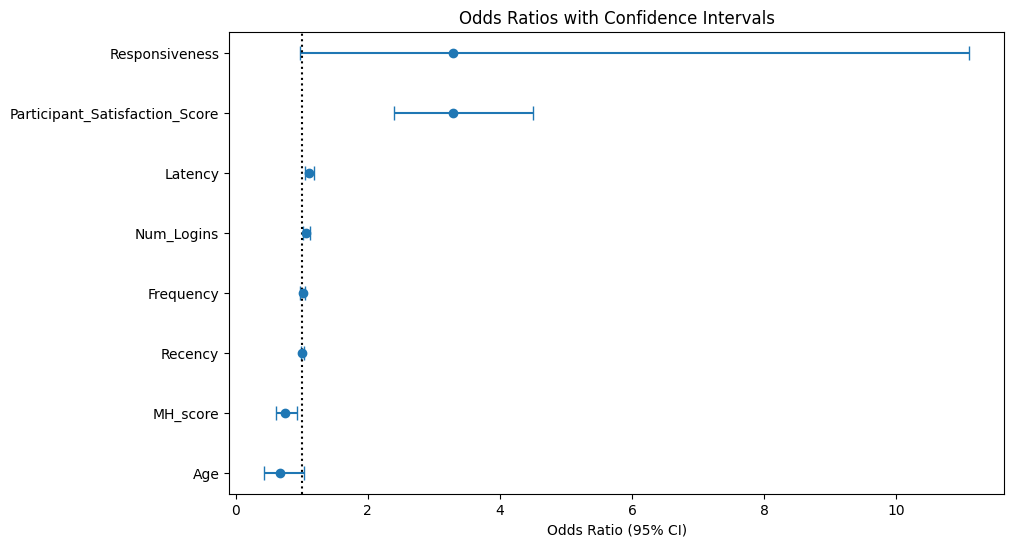

Odds Ratios: Age                                1.026811
MH_score                           0.921461
Participant_Satisfaction_Score     4.496714
Num_Logins                         1.120676
Recency                            1.033407
Frequency                          1.055387
Latency                            1.179290
Responsiveness                    11.099373
dtype: float64 Age                               0.432696
MH_score                          0.605261
Participant_Satisfaction_Score    2.399633
Num_Logins                        1.013546
Recency                           0.983864
Frequency                         0.975399
Latency                           1.053201
Responsiveness                    0.977200
dtype: float64


In [260]:
variable_names = ['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']

# Get the parameter estimates
odds_ratios = np.exp(result.params)

# Get the standard errors of the parameter estimates
standard_errors = result.bse

# Calculate the confidence intervals
alpha = 0.05  # Set the desired significance level
z_critical = np.abs(np.random.normal(0, 1, size=len(odds_ratios)))  # Z-score corresponding to the significance level
lower_bounds = odds_ratios * np.exp(-z_critical * standard_errors)
upper_bounds = odds_ratios * np.exp(z_critical * standard_errors)

# Create a DataFrame to store the odds ratios and confidence intervals
data = pd.DataFrame({'Odds Ratio': odds_ratios,
                                     'Lower Bound': lower_bounds,
                                     'Upper Bound': upper_bounds})

#data = data[1:] # remove const

data["variable"] = variable_names

# Sort the data by odds ratio in descending order
data = data.sort_values(by='Odds Ratio', ascending=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the odds ratios with confidence intervals
plt.errorbar(data['Odds Ratio'], range(len(data)), xerr=[data['Odds Ratio'] - data['Lower Bound'], data['Upper Bound'] - data['Odds Ratio']],
             fmt='o', capsize=5)

# Add a dotted black line at y=1
plt.axvline(x=1, color='black', linestyle='dotted')

# Set the y-axis labels
plt.yticks(range(len(data)), data['variable'])

# Set the x-axis label
plt.xlabel('Odds Ratio (95% CI)')

# Set the plot title
plt.title('Odds Ratios with Confidence Intervals')

# Show the plot
plt.show()

# Print odds ratios
print("Odds Ratios:", upper_bounds, lower_bounds)

In [216]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, outcome_variable, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

# Check the number of 0s and 1s in the training and testing sets
print("Training Set:", y_train.value_counts())
print("Testing Set:", y_test.value_counts())

Training set shape: (800, 8) (800,)
Testing set shape: (200, 8) (200,)
Training Set: Retention
1    531
0    269
Name: count, dtype: int64
Testing Set: Retention
1    141
0     59
Name: count, dtype: int64


In [150]:
# Elastic Net Regression
# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Set the regularization parameters

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients", elastic_net.coef_)

Mean Squared Error: 0.24771406250000005
Coefficients [-0. -0.  0.  0. -0.  0. -0. -0.]


Accuracy: 0.665


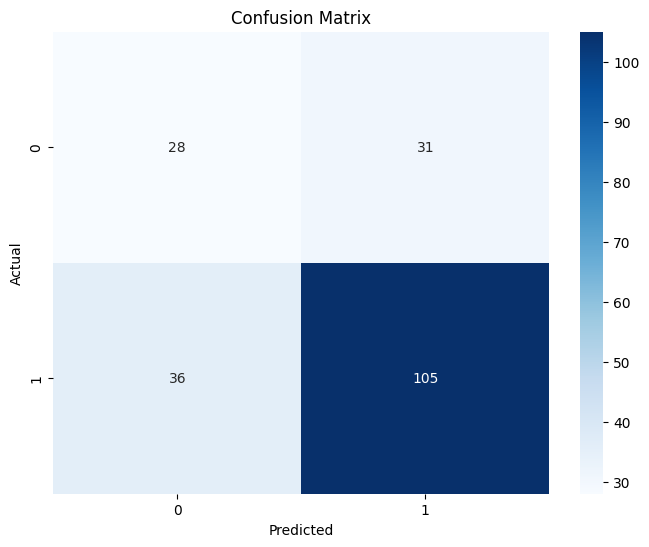

In [219]:
# XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.6891 - accuracy: 0.6275 - val_loss: 0.6142 - val_accuracy: 0.6900
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6762 - val_loss: 0.5726 - val_accuracy: 0.7100
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.6875 - val_loss: 0.5564 - val_accuracy: 0.7050
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5578 - accuracy: 0.7088 - val_loss: 0.5353 - val_accuracy: 0.7050
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7113 - val_loss: 0.5355 - val_accuracy: 0.7400
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7100 - val_loss: 0.5544 - val_accuracy: 0.6950
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7150 - val_loss: 0.5220 - val_accuracy: 0.7450
Epoch 8/10
25/25 [=

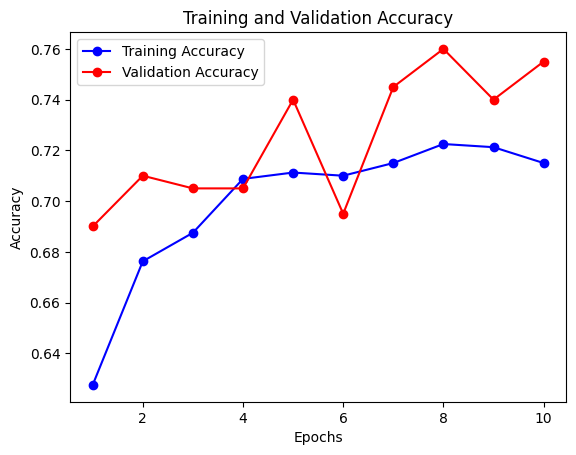

7/7 [==============================] - 0s 2ms/step


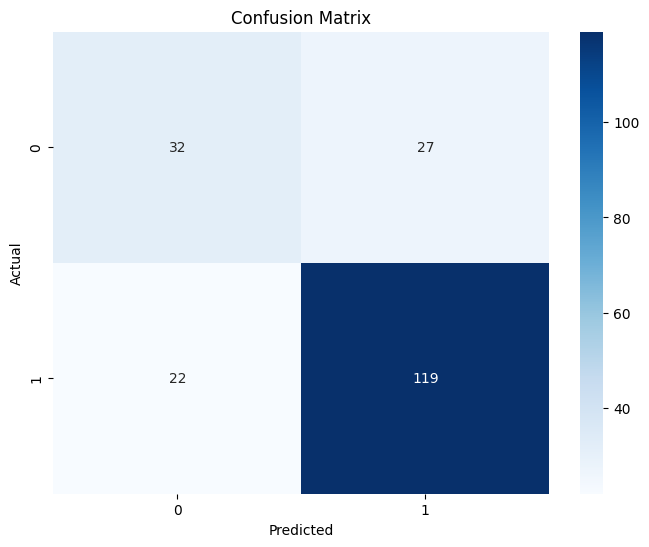

In [218]:
# Neural Network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


# Train the model and store the training history
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy at each epoch
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Confusion matrix
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Flatten the predictions and ground truth labels
#y_pred = np.squeeze(y_pred)
#y_test = np.squeeze(y_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.735
[[ 29  30]
 [ 23 118]]


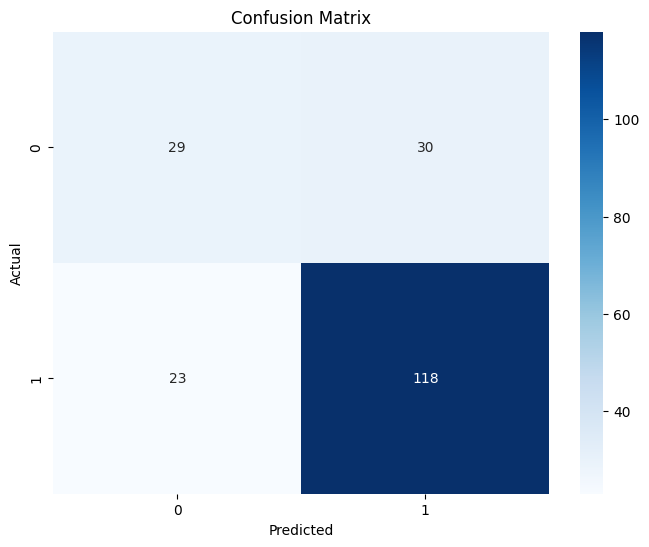

In [217]:
# Calculate risk scores with Logistic Regression

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

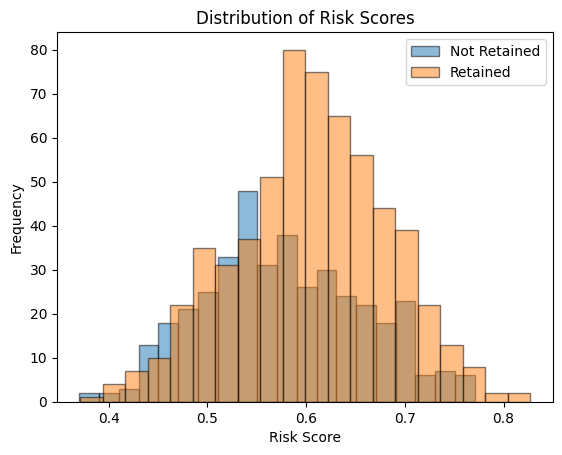

In [207]:
# Generate risk scores for each ID
risk_scores = model.predict_proba(df[['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']])[:, 1]

# Add the risk scores to the dataframe
df['risk_score'] = risk_scores

# Plot the risk scores as a histogram
plt.hist(df['risk_score'][df['Retention'] == 0], bins=20, edgecolor='black', alpha=0.5, label='Not Retained')
plt.hist(df['risk_score'][df['Retention'] == 1], bins=20, edgecolor='black', alpha=0.5, label='Retained')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.legend()
plt.show()

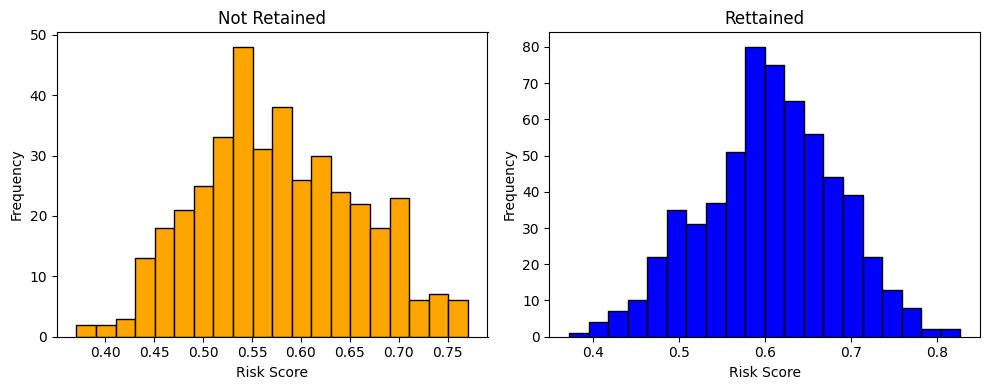

In [208]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for retention 0
axs[0].hist(df['risk_score'][df['Retention'] == 0], bins=20, edgecolor='black', color = 'orange')
axs[0].set_xlabel('Risk Score')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Not Retained')

# Plot the histogram for retention 1
axs[1].hist(df['risk_score'][df['Retention'] == 1], bins=20, edgecolor='black', color = 'blue')
axs[1].set_xlabel('Risk Score')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Rettained')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [212]:
print("Age:", df['risk_score'].corr(df['Age']))
print("MH Score:", df['risk_score'].corr(df['MH_score']))
print("Satisfaction:", df['risk_score'].corr(df['Participant_Satisfaction_Score']))

Age: 0.38602155071184796
MH Score: -0.8479793345257606
Satisfaction: 0.27800796673465755


In [195]:
df[['risk_score', 'Retention']][df['risk_score'] < 0.5].groupby('Retention').size()

Retention
0    90
1    78
dtype: int64

In [ ]:
# Allocates individuals with a retention score less than 0.5 to a recovery strategy

def allocate_recovery_strategy(risk_score):
    if risk_score < 0.5:
        return "Recovery Strategy A"
    else:
        return "Recovery Strategy B"

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.7131 - accuracy: 0.5675 - val_loss: 0.7088 - val_accuracy: 0.5500
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.6100 - val_loss: 0.7026 - val_accuracy: 0.5750
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.6137 - val_loss: 0.6956 - val_accuracy: 0.5550
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5975 - val_loss: 0.6900 - val_accuracy: 0.5350
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6200 - val_loss: 0.7183 - val_accuracy: 0.5600
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6125 - val_loss: 0.6940 - val_accuracy: 0.5250
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6150 - val_loss: 0.7015 - val_accuracy: 0.5350
Epoch 8/10
25/25 [=

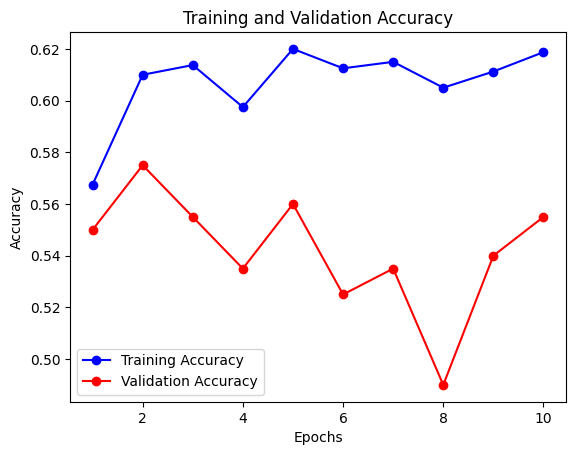

const                             0.404284
Age                              -0.753087
MH_score                          0.119381
Participant_Satisfaction_Score    1.037400
Num_Logins                        0.097499
Recency                           0.002778
Frequency                        -0.088967
Latency                           0.013343
Responsiveness                    2.406194
dtype: float64